In [166]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import matplotlib.image as gambar
import cv2
from scipy import signal

ModuleNotFoundError: No module named 'scipy'

Code diatas untuk import numpy, cv2 dan matplotlib

Setelah itu, menampilkan gambar yang akan diimport dengan code berikut

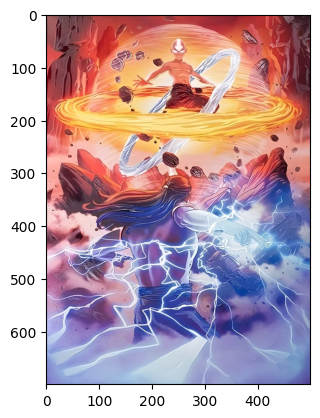

In [ ]:
image = plt.imread("aang.jpg",0)
plt.imshow(image) 

Langkah selanjutnya dengan mengubah gambar menjadi grayscale terlebih dahulu

(700, 500)


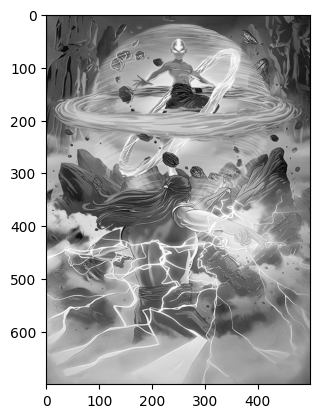

In [ ]:
gray =cv2.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray")
print (gray.shape)

In [ ]:
clipped_image = np.clip(gray, 120, 200)  

normalized_image = cv2.normalize(clipped_image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

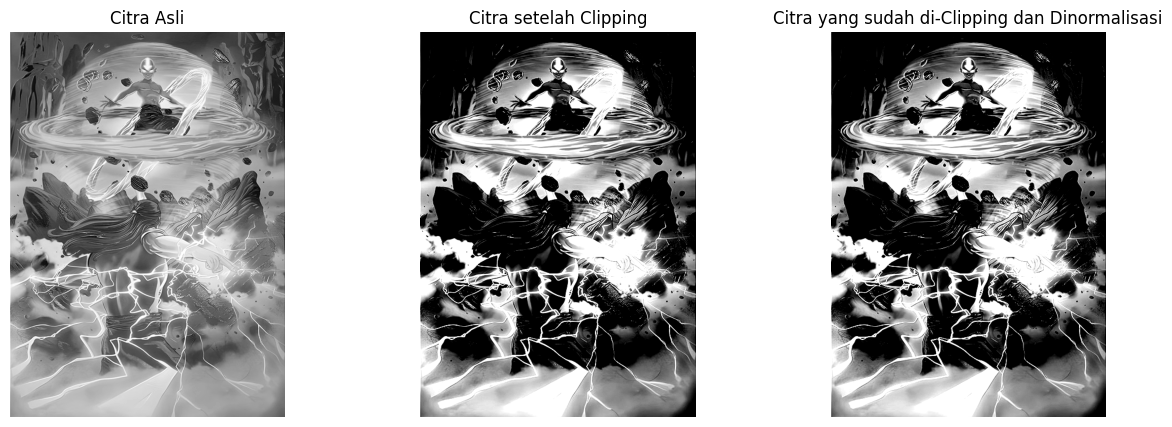

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(gray, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(clipped_image, cmap='gray')
plt.title('Citra setelah Clipping')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(normalized_image, cmap='gray')
plt.title('Citra yang sudah di-Clipping dan Dinormalisasi')
plt.axis('off')

plt.show()

<BarContainer object of 256 artists>

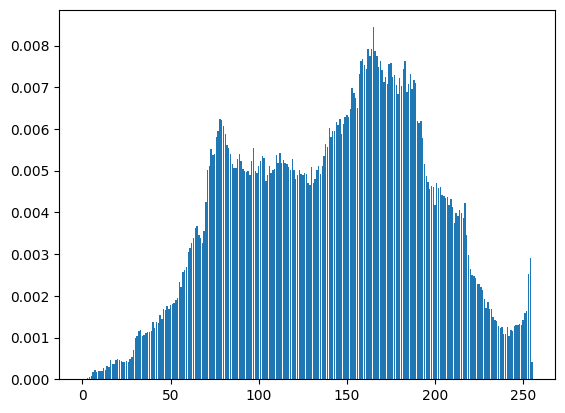

In [ ]:
height, width = normalized_image.shape
sumGray = np.zeros(256).astype(int)

for i in range (height):
    for j in range (width):
        val = gray [i,j]
        sumGray[val]+=1
    
    grayVal = [i for i in range(256)]
    
plt.bar(grayVal, sumGray/sumGray.sum())

Code diatas untuk membuat sebuah array dengan ukuran 256 dengan seluruh elemnnya bernilai 0

Text(0.5, 1.0, 'Citra Konvolusi')

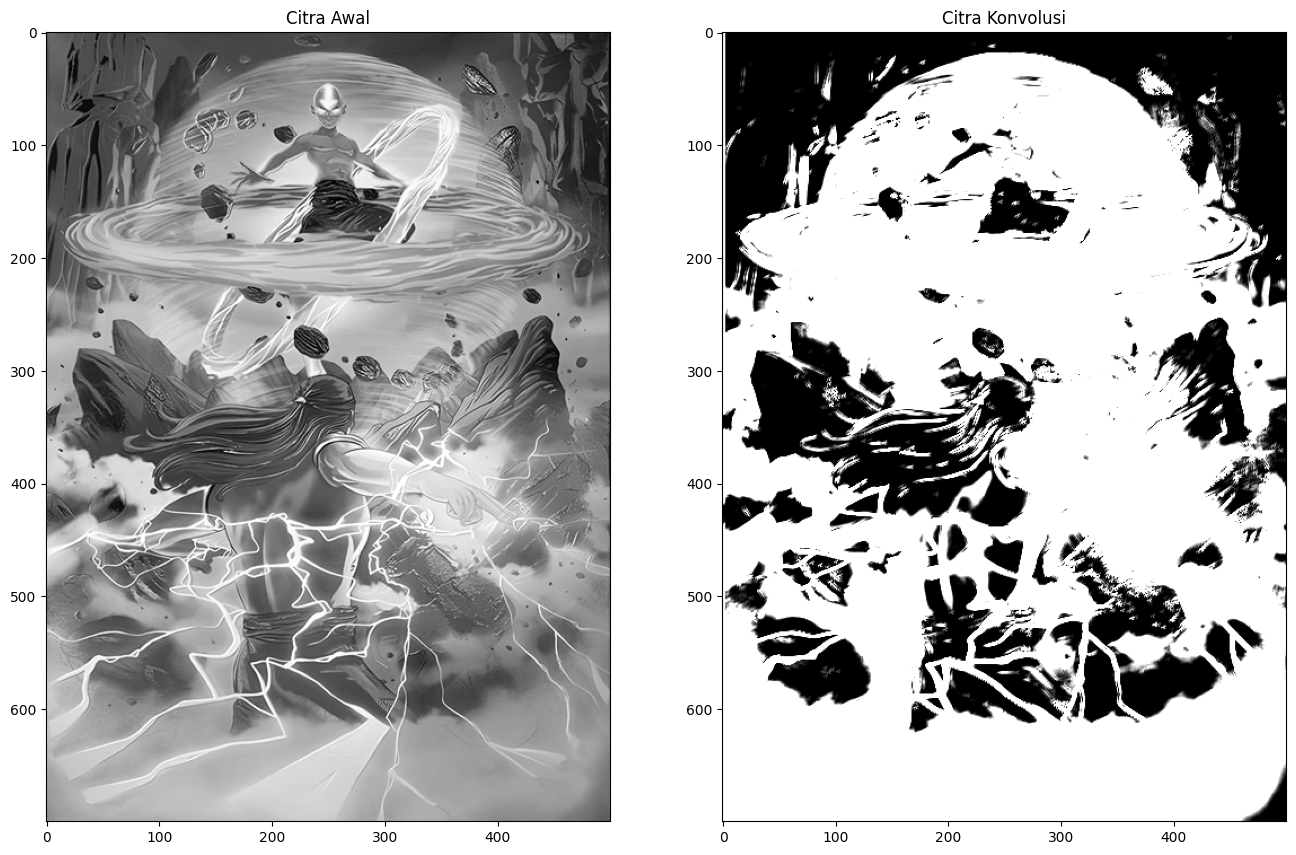

In [ ]:
kernel = np.array([
    [1,2,-1,1],
    [0,2,1,2],
    [2,1,1,0],
    [1,0,-1,0],
])
citraOutput = cv2.filter2D(normalized_image, -1, kernel)

fig, axes = plt.subplots(1,2,figsize=(16,16))
ax = axes.ravel()

ax[0].imshow(gray,cmap='gray')
ax[0].set_title("Citra Awal")
ax[1].imshow(citraOutput, cmap = 'gray')
ax[1].set_title("Citra Konvolusi")

Sebelum melakukan konvolusi dengan zero padding, terlebih dahulu menginisialisasi kernel yang dimiliki

Setelah itu, lakukan konvolusi dengan zero padding untuk mendapatkan detail yang lebih tinggi pada gambar

In [ ]:
height, width = gray.shape[:2]
center = (width // 2, height // 2)
angle = -40  #- artinya searah jarum jam

matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated_image = cv2.warpAffine(gray, matrix, (width, height))

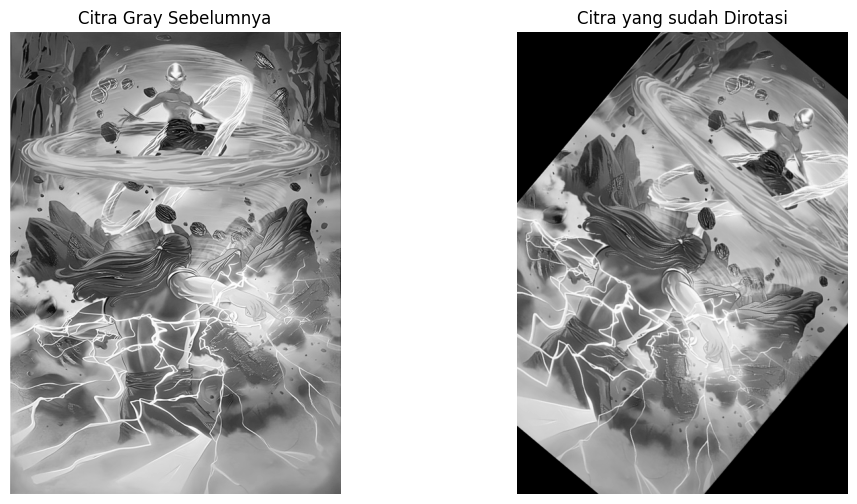

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title('Citra Gray Sebelumnya')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rotated_image, cmap='gray')
plt.title('Citra yang sudah Dirotasi')
plt.axis('off')

plt.show()

In [ ]:
M = np.float32([[1, 0, -163], [0, 1, 300]])
translated_image = cv2.warpAffine(rotated_image, M, (width, height))

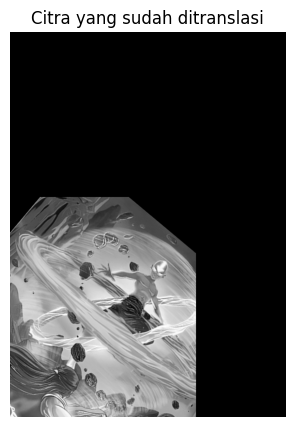

In [ ]:
plt.figure(figsize=(8, 5))
plt.imshow(translated_image, cmap='gray')
plt.title('Citra yang sudah ditranslasi')
plt.axis('off')
plt.show()

Text(0.5, 1.0, 'Citra yang sudah Dicerminkan')

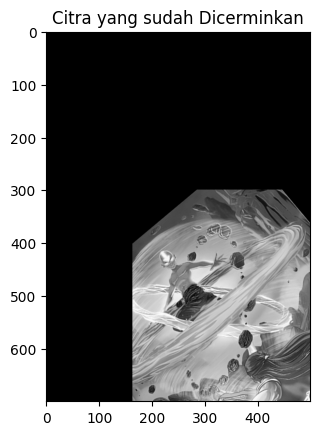

In [167]:
flipped_image = cv2.flip(translated_image, 1)
plt.imshow(flipped_image, cmap='gray')
plt.title('Citra yang sudah Dicerminkan')

In [172]:
new_height = int(flipped_image.shape[0] * 3)
new_width = int(flipped_image.shape[1] * 3)

dilated_image = cv2.resize(flipped_image, (new_width, new_height))

Text(0.5, 1.0, 'Citra yang sudah Dilatasi')

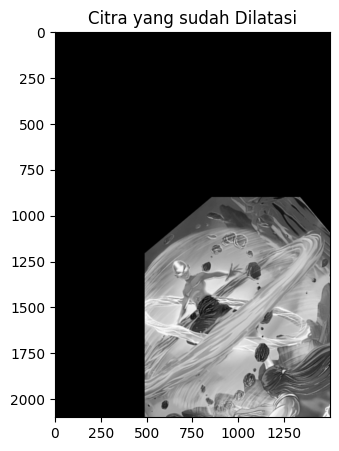

In [173]:
plt.figure(figsize=(8, 5))
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra yang sudah Dilatasi')